<a href="https://colab.research.google.com/github/MennaAyman5/c_t/blob/main/Copy_of_Candy_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: cleanning - [candy data]
### this notebook is for educational purpose . in this notebook we will do some cleanning

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">wrangling</a></li>
  
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> i will go through candy data 2017 , this data has :
- Internal_ID
- Q1-Going Out?: Are you actually going trick or treating yourself? "has values `Yes or No`"
- Q2-Gender: It has four different options, `Femal ,Male ,Other ,I'd rather not say`
- Q3-Age: Numerical field
- Q4-Country: Text Field, but users have written their own version of the names. Example, for America, there are entries such as USA, us, US, America so we should consider that while cleanning
- Q5-State/Province: Text Field, but users have written their own version of the names. Same as the country data.
- Q6-Joy Or Despair: All kinds of chocolate bars are the questions with three distinct options to choose from (Joy, Meh, Despair).
- Q7-Joy Other: Text Field to write items not included above that give you JOY. Lots of missing values.
- Q8-Despair Other: Text Field ti write items not included above that give you DESPAIR. Lots of missing values.
- Q9-Other Comments: Text Field. Lots of missing values.
- Q10-Dress: Binary field. Missing values present
- Unnamed: 113
- Q11-Day: Binary Answer Field. Missing values present


# 1- import packages and load data

In [83]:
import pandas as pd
import numpy as np

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

In [85]:
from google.colab import files
uploaded = files.upload()

Saving candyhierarchy2017.xlsx to candyhierarchy2017 (3).xlsx


In [86]:
df= pd.read_excel('candyhierarchy2017.xlsx') 

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [87]:
sns.set_palette("RdBu")

<a id='wrangling'></a>
## Data Wrangling



### General Properties

# 2- show some general properties for the data 

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Columns: 120 entries, Internal ID to Click Coordinates (x, y)
dtypes: float64(4), int64(1), object(115)
memory usage: 2.3+ MB


In [89]:
df.duplicated().any()

False

In [90]:
df.shape

(2460, 120)

In [91]:
df.describe()

,Internal ID,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo]
count,2.460000e+03,85.0,1362.0,99.0,67.0
mean,9.028016e+07,1.0,1.0,1.0,1.0
std,7.435532e+03,0.0,0.0,0.0,0.0
min,9.025877e+07,1.0,1.0,1.0,1.0
25%,9.027520e+07,1.0,1.0,1.0,1.0
50%,9.027780e+07,1.0,1.0,1.0,1.0
75%,9.028242e+07,1.0,1.0,1.0,1.0
max,9.031480e+07,1.0,1.0,1.0,1.0


In [92]:
df.isnull().sum()

Internal ID                    0
Q1: GOING OUT?               110
Q2: GENDER                    41
Q3: AGE                       84
Q4: COUNTRY                   64
                            ... 
Q12: MEDIA [Daily Dish]     2375
Q12: MEDIA [Science]        1098
Q12: MEDIA [ESPN]           2361
Q12: MEDIA [Yahoo]          2393
Click Coordinates (x, y)     855
Length: 120, dtype: int64

In [93]:
df.index

RangeIndex(start=0, stop=2460, step=1)

In [94]:
df.size

295200

In [95]:
df.empty

False

In [96]:
df.dtypes

Internal ID                   int64
Q1: GOING OUT?               object
Q2: GENDER                   object
Q3: AGE                      object
Q4: COUNTRY                  object
                             ...   
Q12: MEDIA [Daily Dish]     float64
Q12: MEDIA [Science]        float64
Q12: MEDIA [ESPN]           float64
Q12: MEDIA [Yahoo]          float64
Click Coordinates (x, y)     object
Length: 120, dtype: object

# 3- write summary about what you get form the above functions
> #### tips : this summary can be about : if there is any missing values , if there a wrong data type , if there a wrong range of values , ....

In [ ]:
"""
 In this datafram; it has many missing values , 
Na duplicated ,
It contain 295200 items ,
No wrong range of values in internal id ,
RangeIndex(start=0, stop=2460, step=1) ,
dtypes of the data is: float64(4), int64(1), object(115),

 """

# cleaning

### 4- drop all the useless columns and  rows with too much NaN , 
> tip : useless columns can be like `Internal ID`and can be also columns with too much NaN 
- rename columns for easy access

In [97]:
df.iloc[:,0:60].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 60 columns):
 #   Column                                                                                 Non-Null Count  Dtype 
---  ------                                                                                 --------------  ----- 
 0   Internal ID                                                                            2460 non-null   int64 
 1   Q1: GOING OUT?                                                                         2350 non-null   object
 2   Q2: GENDER                                                                             2419 non-null   object
 3   Q3: AGE                                                                                2376 non-null   object
 4   Q4: COUNTRY                                                                            2396 non-null   object
 5   Q5: STATE, PROVINCE, COUNTY, ETC                                                   

In [98]:
df.iloc[:,60:120].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Data columns (total 60 columns):
 #   Column                                                                       Non-Null Count  Dtype  
---  ------                                                                       --------------  -----  
 0   Q6 | Milk Duds                                                               1767 non-null   object 
 1   Q6 | Milky Way                                                               1772 non-null   object 
 2   Q6 | Regular M&Ms                                                            1785 non-null   object 
 3   Q6 | Peanut M&M’s                                                            1789 non-null   object 
 4   Q6 | Blue M&M's                                                              1733 non-null   object 
 5   Q6 | Red M&M's                                                               1731 non-null   object 
 6   Q6 | Green Party M&M's                  

In [99]:
d=df.drop(['Q8: DESPAIR OTHER','Q9: OTHER COMMENTS','Q12: MEDIA [Yahoo]', 'Q12: MEDIA [Daily Dish]','Q12: MEDIA [ESPN]'], axis=1)


In [100]:
d.shape

(2460, 115)

### 5 - clean `going out` column 
> tip : you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

In [101]:
set(df['Q1: GOING OUT?'])

{'No', 'Yes', nan}

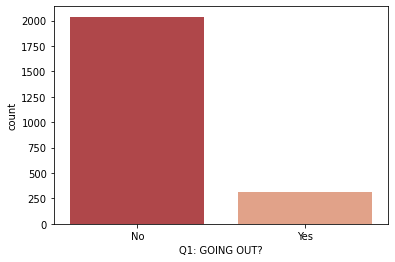

In [102]:
sns.countplot(x="Q1: GOING OUT?",data=df)
plt.show()

In [103]:
y= df.replace(to_replace=np.nan, value="unkown")

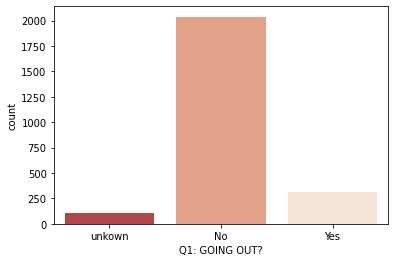

In [104]:
sns.countplot(x="Q1: GOING OUT?",data=y)
plt.show()

### 6 - clean ` gender` column 
> tip : you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

In [105]:
set(df['Q2: GENDER'])

{'Female', "I'd rather not say", 'Male', 'Other', nan}

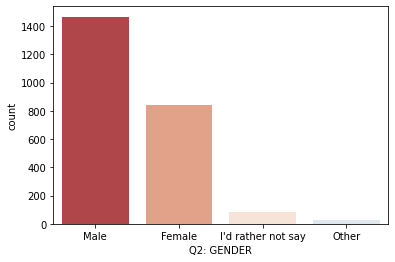

In [106]:
sns.countplot(x="Q2: GENDER",data=df)
plt.show()

In [107]:
o= df.replace(to_replace="I'd rather not say", value=np.nan)

In [108]:
p= o.replace(to_replace=np.nan, value="Other")

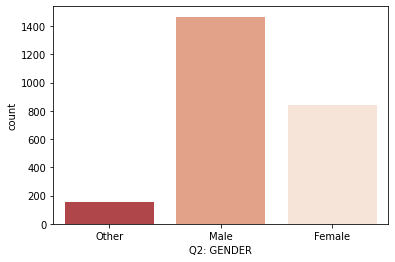

In [109]:
sns.countplot(x="Q2: GENDER",data=p)
plt.show()

### 7 - clean ` age` column 
> tip : note the type of age column , and NaN values
 - try to use `to_numeric` 
 - tip : you should choose which best value to put in place of these NaNs ( mean, median, ....etc)

In [110]:
set(df['Q3: AGE'])

{1,
 10,
 100,
 1000,
 102,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 '24-50',
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 312,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 39.4,
 4,
 40,
 41,
 42,
 43,
 44,
 45,
 '45-55',
 46,
 '46 Halloweens.',
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 '59 on the day after Halloween',
 '5u',
 6,
 60,
 '60+',
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 7,
 70,
 70.5,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 8,
 88,
 9,
 90,
 99,
 '?',
 'Enough',
 'I can remember when Java was a cool new language',
 'MY NAME JEFF',
 'Many',
 'OLD',
 'Old enough',
 'Over 50',
 'See question 2',
 'ancient',
 'hahahahaha',
 nan,
 'no',
 'old',
 'old enough',
 'older than dirt',
 'sixty-nine',
 'your mom'}

In [101]:
#z= df['Q3: AGE'].str.replace(r'/D+'," ")


In [111]:
df["Q3: AGE"]= pd.to_numeric(df['Q3: AGE'],errors='coerce')
#coerce
#ignore

In [112]:
df.loc[df['Q3: AGE']>99,"Q3: AGE"]=np.nan


In [113]:
df["Q3: AGE"].describe()

count    2347.000000
mean       42.020409
std        11.982084
min         1.000000
25%        34.000000
50%        41.000000
75%        50.000000
max        99.000000
Name: Q3: AGE, dtype: float64

In [114]:

df['Q3: AGE'].replace(to_replace=np.nan, value="41")

0         41
1       44.0
2       49.0
3       40.0
4       23.0
        ... 
2455    24.0
2456    33.0
2457    26.0
2458    58.0
2459    66.0
Name: Q3: AGE, Length: 2460, dtype: object

### 8 - clean ` country` column
> tip : note that country column has country names with different writing ways 
  - use fuzzywuzzy to deal with this problem
  - you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

In [115]:
df['Q4: COUNTRY'] = df['Q4: COUNTRY'].str.strip().str.lower()
#df['Q4: COUNTRY']=df['Q4: COUNTRY'].str.replace(' ','')
df['Q4: COUNTRY'].unique()

array([nan, 'usa', 'us', 'canada', 'murica', 'united states', 'uk',
       'united kingdom', 'united staes', 'united states of america',
       'uae', 'england', 'mexico', 'u.s.a.', 'usausausa', 'america',
       'france', 'finland', 'unhinged states', 'us of a', 'unites states',
       'the united states', 'north carolina', 'unied states',
       'netherlands', 'germany', 'europe', 'earth', 'u s', 'u.s.', 'u.k.',
       'costa rica', 'the united states of america', 'unite states',
       'cascadia', 'australia', 'insanity lately', 'greece',
       'usa? hard to tell anymore..', "'merica", 'usas', 'pittsburgh',
       'united state', 'a', 'can', 'canae', 'new york', 'trumpistan',
       'ireland', 'united sates', 'korea', 'california', 'japan',
       'south africa',
       'i pretend to be from canada, but i am really from the united states.',
       'iceland', 'canada`', 'scotland', 'denmark', 'united stated',
       'switzerland', 'ahem....amerca', 'ud', 'south korea', 'new jersey',

In [53]:
df['Q4: COUNTRY'] = df['Q4: COUNTRY'].replace({'us':'usa', 'murica':'usa','united states':'usa', 'united states of america':'usa','united staes':'usa','america':'usa', 'u.s.a.':'usa','uae':'usa',
'north carolina':'usa', 'usa? hard to tell anymore..':'usa', 'pittsburgh':'usa', 'new york':'usa', 'trumpistan':'usa',
          'california':'usa', 'ud':'usa', 'new jersey':'usa', 'endland':'uk', 'soviet canuckistan':'canada',
           'u s a':'usa', 'united kingdom england':'uk', 'u.k.':'uk', 'cascadia':'usa','us of a':'usa','usausausa':'usa','unites states':'usa','the united states':'usa','unhinged states':'usa',
          'unied states':'usa','u s':'usa','u.s.':'usa','the united states of america':'usa','unite states':'usa','usa? hard to tell anymore..':'usa',"'merica":'usa','usas':'usa',
          'united state':'usa', 'a':'usa', 'can':'canada', 'canae':'canada', 'new york':'usa','united sates':'usa','new york':'usa','united sates':'usa',
          'i pretend to be from canada, but i am really from the united states.':'usa','united stated':'usa','ahem....amerca':'usa','united ststes':'usa','united statss':'usa',
          'usa! usa! usa!':'usa', 'usaa':'usa','n. america':'usa','ussa':'usa','u s a':'usa', 'united statea':'usa','usa usa usa!!!!':'usa'})

In [58]:
unknown = [x for x in df['Q4: COUNTRY'].unique()]
unknown.remove('usa')
unknown.remove('canada')
unknown.remove('uk')

In [59]:
df["Q4: COUNTRY"]= df["Q4: COUNTRY"].replace(to_replace = unknown, value = 'other-country')
df['Q4: COUNTRY'].value_counts()

usa              2051
canada            227
other-country     162
uk                 20
Name: Q4: COUNTRY, dtype: int64

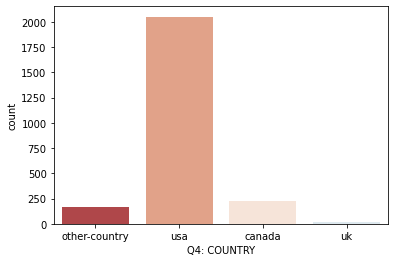

In [60]:
sns.countplot(x="Q4: COUNTRY",data=df)
plt.show()

In [57]:
set(df['Q4: COUNTRY'])

{'canada', 'other-country', 'uk', 'usa'}

### 9 - clean ` area` column
> tip : area column has the same problem as country columns , but looking at all it's unique values may give us another way to deal with it rather than try to fix it

In [73]:
#df.rename(columns = {'Q5: STATE, PROVINCE, COUNTY, ETC':'arae'})

In [74]:
set(df['Q5: STATE, PROVINCE, COUNTY, ETC'])

{1,
 48,
 'A',
 'AB',
 'AZ',
 'Abu Dhabi',
 'Alabama',
 'Alaska',
 'Alaska, Matanuska-Susitna Borough',
 'Albeqrrta',
 'Alberta',
 'Alberta ',
 'America',
 'Ar',
 'Arizona',
 'Arizona ',
 'Arkansas',
 'Arlington, VA',
 'Astoria NY',
 'Atlanta, GA',
 'Az',
 'BC',
 'BERKELEY, CA',
 'Baja California',
 'Bc',
 'Berlin',
 'Bloomington, IN',
 'Bristol ',
 'Bristol County, Rhode Island',
 'British Columbia',
 'British Columbia ',
 'British Columbia, Canada',
 'Brooklyn',
 'Brooklyn, kings county ny',
 'Buncombe County, North Carolina',
 'CA',
 'CA, Alameda',
 'CDMX',
 'CO',
 'CO, Larimer County',
 'COLORADO',
 'CT',
 'Ca',
 'Cali',
 'Califor',
 'California',
 'California ',
 'California, Alameda',
 'California, Contra Costa County, Pleasant Hill',
 'California, Mendocino County',
 'California, San Diego',
 'California, San Diego county',
 'California, San Francisco',
 'California, USA',
 'California, Ventura County',
 'Canada',
 'Carver county, MN',
 'Chicago',
 'Chicago, IL',
 'Chicago, IL '

In [75]:
df["Q5: STATE, PROVINCE, COUNTY, ETC"].nunique()

511

In [76]:
df.drop(columns =['Q5: STATE, PROVINCE, COUNTY, ETC'], inplace = True)

### 10 - clean ` Q6` columns
>- tip : Q6 has all kinds of chocolate bars and questions with three distinct options to choose from (Joy, Meh, Despair).
- so all the column that has Q6 is a candy name , so you should go through all these column and you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

In [81]:
data=df[df.columns[5:-12]]

In [82]:
data.replace(to_replace=np.nan, value="unknown")

,Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,Q6 | Bonkers (the candy),Q6 | Bonkers (the board game),Q6 | Bottle Caps,Q6 | Box'o'Raisins,Q6 | Broken glow stick,Q6 | Butterfinger,...,Q6 | Those odd marshmallow circus peanut things,Q6 | Three Musketeers,Q6 | Tolberone something or other,Q6 | Trail Mix,Q6 | Twix,"Q6 | Vials of pure high fructose corn syrup, for main-lining into your vein",Q6 | Vicodin,Q6 | Whatchamacallit Bars,Q6 | White Bread,Q6 | Whole Wheat anything
0,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,...,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
1,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR,...,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,DESPAIR,DESPAIR
2,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,...,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
3,MEH,DESPAIR,JOY,MEH,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,...,DESPAIR,DESPAIR,JOY,MEH,JOY,DESPAIR,JOY,JOY,DESPAIR,DESPAIR
4,JOY,DESPAIR,JOY,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,...,DESPAIR,JOY,JOY,DESPAIR,JOY,MEH,JOY,JOY,DESPAIR,DESPAIR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,JOY,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,MEH,...,DESPAIR,MEH,MEH,JOY,JOY,MEH,JOY,DESPAIR,MEH,DESPAIR
2456,MEH,DESPAIR,JOY,unknown,unknown,unknown,unknown,DESPAIR,DESPAIR,JOY,...,DESPAIR,MEH,MEH,DESPAIR,JOY,unknown,unknown,JOY,DESPAIR,MEH
2457,MEH,DESPAIR,JOY,DESPAIR,MEH,JOY,DESPAIR,MEH,MEH,DESPAIR,...,DESPAIR,JOY,JOY,MEH,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR
2458,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,...,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown


### 11 - clean ` dress` column
>tip : you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

In [133]:
set(df["Q10: DRESS"])

{'Blue and black', 'White and gold', nan}

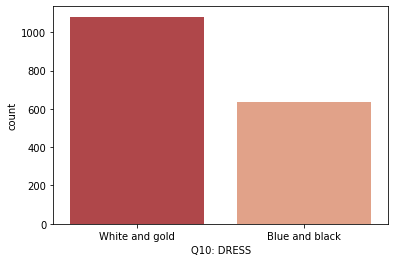

In [135]:
sns.countplot(x="Q10: DRESS",data=df)
plt.show()

In [141]:
m=df.replace(to_replace=np.nan, value="No_Answer")

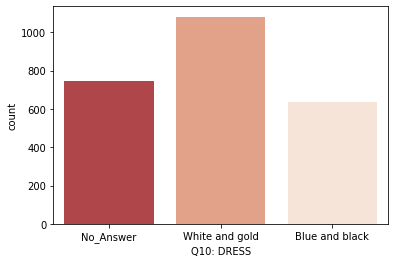

In [143]:
sns.countplot(x="Q10: DRESS",data=m)
plt.show()

### 12 - clean ` day` column
>tip : you should choose which best value to put in place of these NaNs ( mode, unknown,other ....etc)

In [145]:
set(df['Q11: DAY'])

{'Friday', 'Sunday', nan}

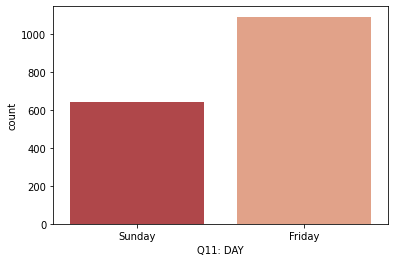

In [146]:
sns.countplot(x="Q11: DAY",data=df)
plt.show()

In [148]:
n=df.replace(to_replace=np.nan, value="Not_choose_day")

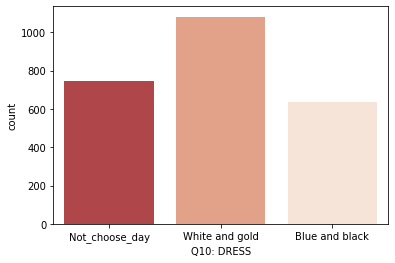

In [149]:
sns.countplot(x="Q10: DRESS",data=n)
plt.show()

### 13 - check
> after finish cleaning you should make sure your data is clean and that :
- there is no wrong data type
- there is no NaN values 
- all the column are cleaing and ready for the next step `EDA`

In [150]:
df.fillna("No_Value",inplace=True)


In [151]:
df.head()

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,...,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
0,90258773,No_Value,No_Value,No_Value,No_Value,No_Value,No_Value,No_Value,No_Value,No_Value,...,No_Value,No_Value,No_Value,No_Value,No_Value,No_Value,No_Value,No_Value,No_Value,No_Value
1,90272821,No,Male,44.0,usa,NM,MEH,DESPAIR,JOY,MEH,...,No_Value,Bottom line is Twix is really the only candy w...,White and gold,No_Value,Sunday,No_Value,1.0,No_Value,No_Value,"(84, 25)"
2,90272829,No_Value,Male,49.0,usa,Virginia,No_Value,No_Value,No_Value,No_Value,...,No_Value,No_Value,No_Value,No_Value,No_Value,No_Value,No_Value,No_Value,No_Value,No_Value
3,90272840,No,Male,40.0,us,or,MEH,DESPAIR,JOY,MEH,...,No_Value,Raisins can go to hell,White and gold,No_Value,Sunday,No_Value,1.0,No_Value,No_Value,"(75, 23)"
4,90272841,No,Male,23.0,usa,exton pa,JOY,DESPAIR,JOY,DESPAIR,...,No_Value,No_Value,White and gold,No_Value,Friday,No_Value,1.0,No_Value,No_Value,"(70, 10)"


### 14 - write a summary about all the cleaning steps 

- This data about candy data 2017, this data has a lot of questions that explain survey for some people ( Male or Female ) and some not write his gender, I replaced the not real data(missing data) to (“ I’d rather not say ”) .
- In the age column, some of them write impossible age, I make the grater age is 98 and replace the missing values by the most value written age(41).
- In country column, it contain a lot of values that means the same things. I replaced it by 3 values which are the most(usa , Canada , uk ) and replace anther minimum values to(other-country).
- In an area column, unique number very big so I delete column.
- In Q6 columns, I replace all missing values to (unknown) values.
In dress column, the answers are (white and gold , blue and black , missing values)
I replace the missing values in this column to (No_Answer)
-In day column , the answers are (Sunday , Friday) and I replacing missing values to 
(Not_choose_day).
-And finally I replaced all missing values in the data frame to(No_Value).
-I explained all data and it’s visualization in the notebook.



### show which are the 10 most loved and most hated chocolates.


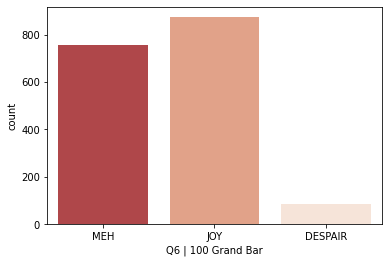

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


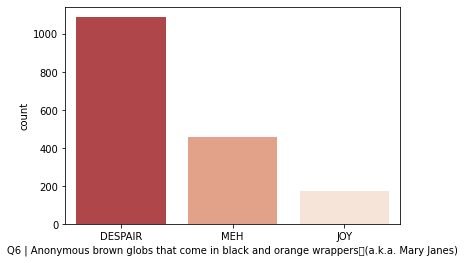

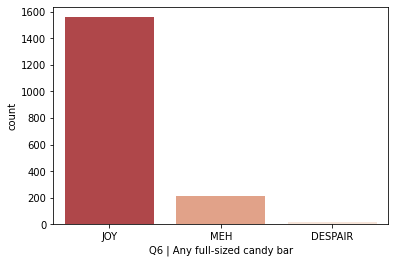

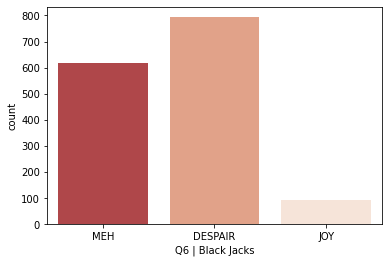

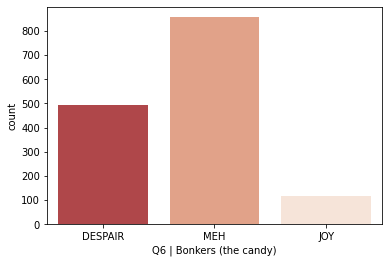

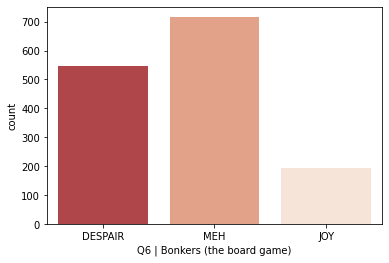

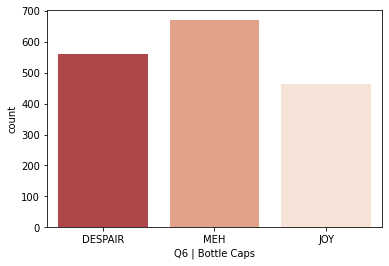

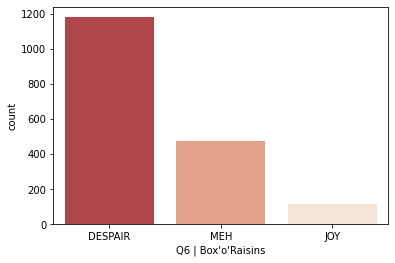

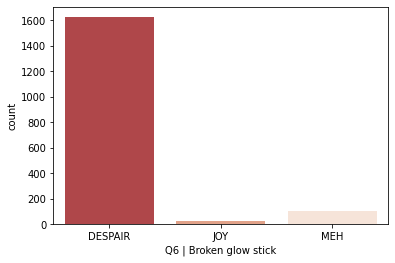

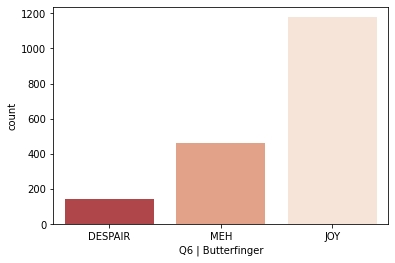

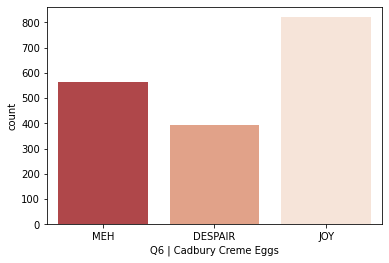

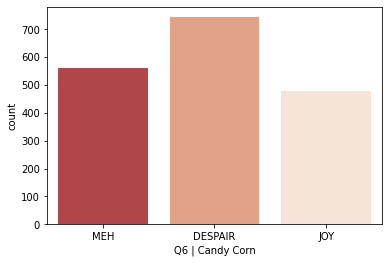

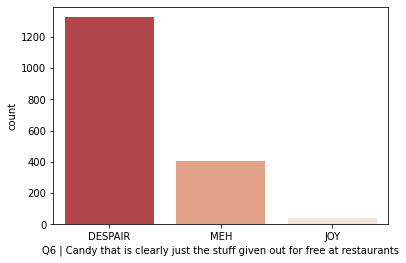

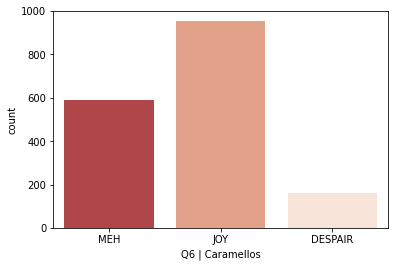

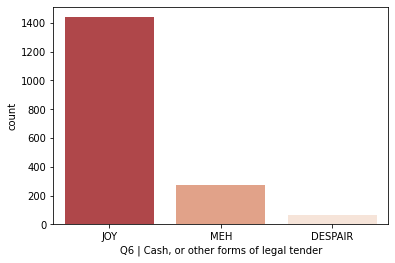

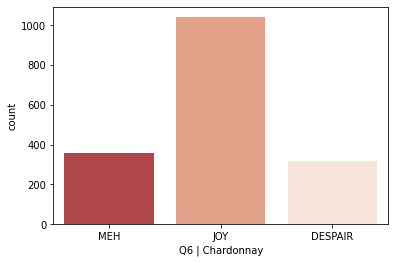

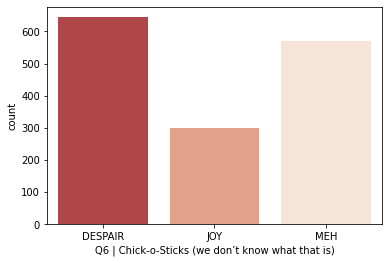

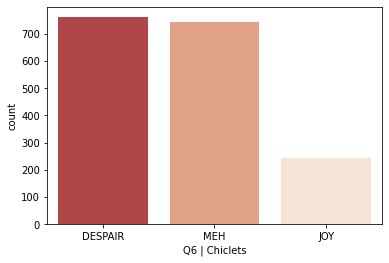

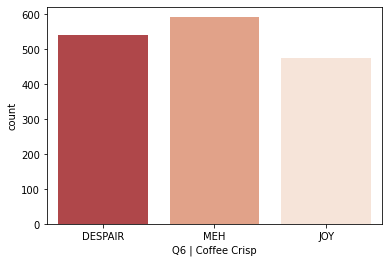

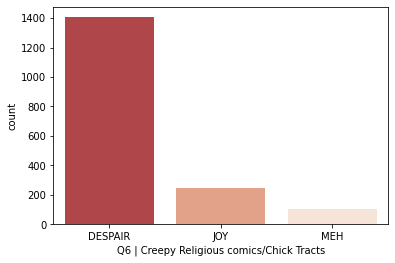

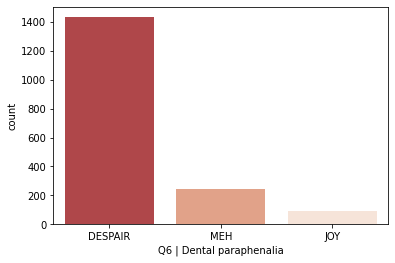

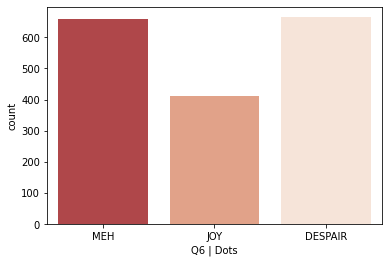

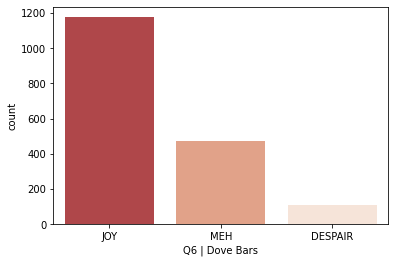

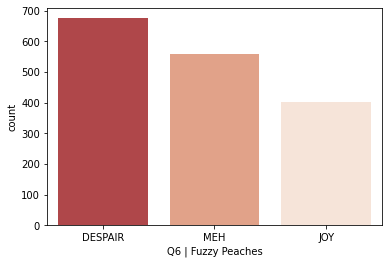

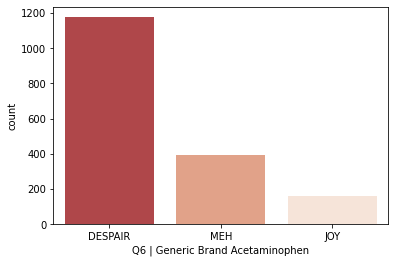

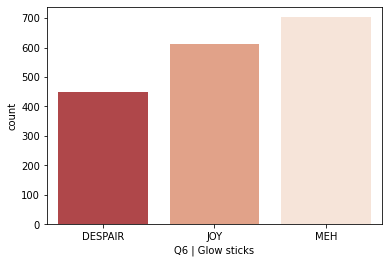

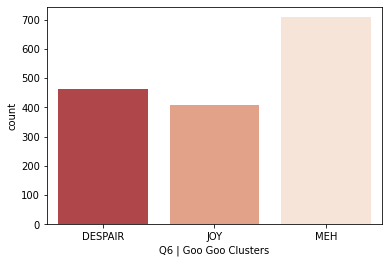

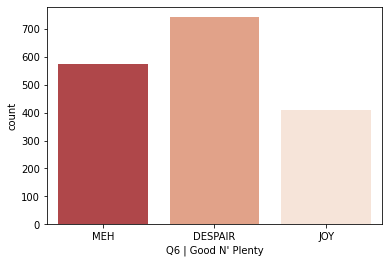

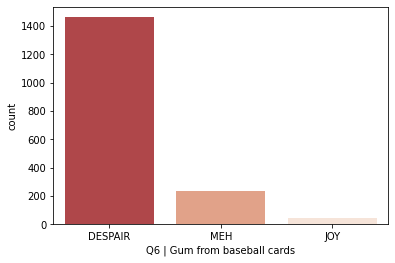

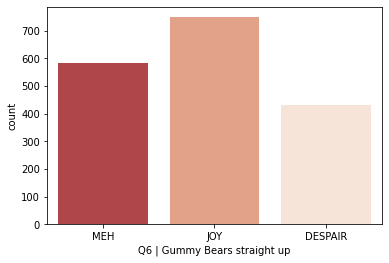

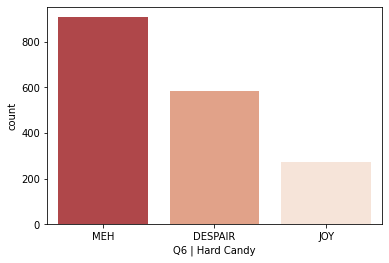

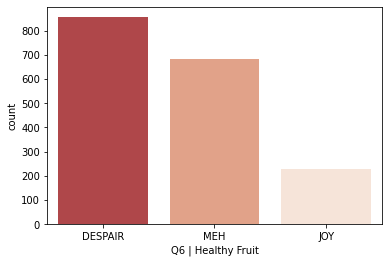

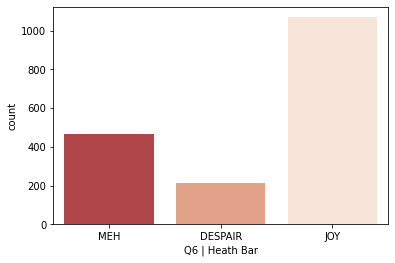

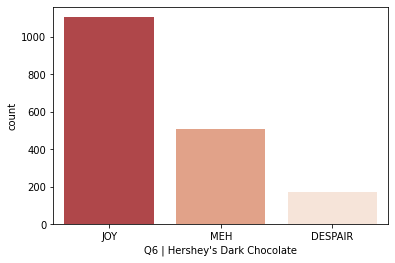

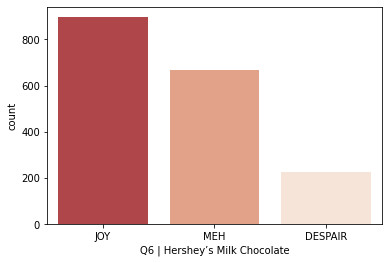

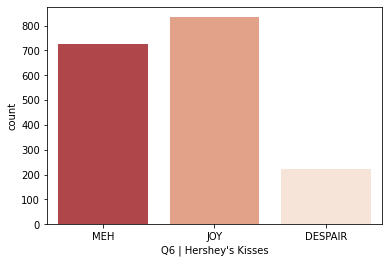

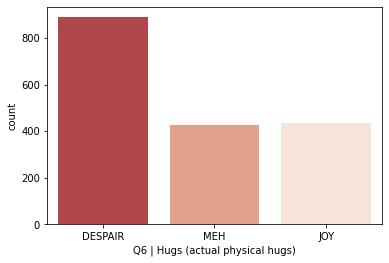

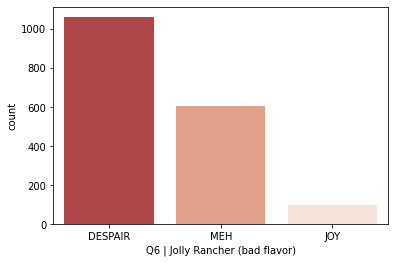

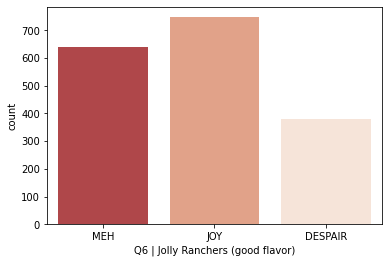

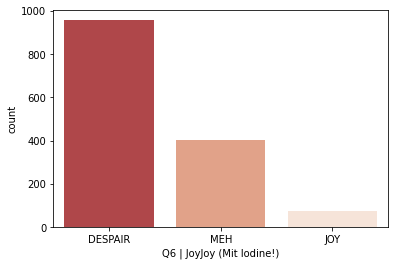

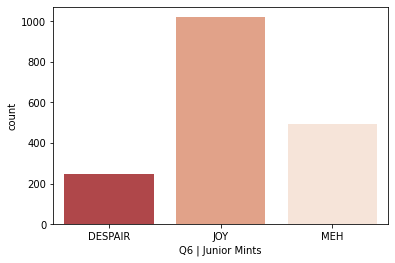

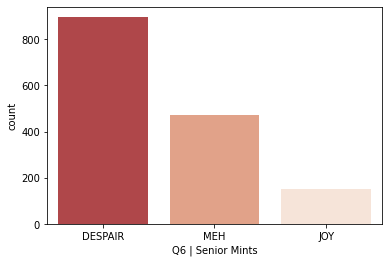

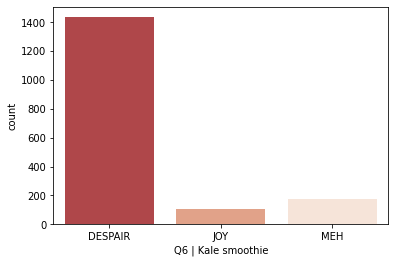

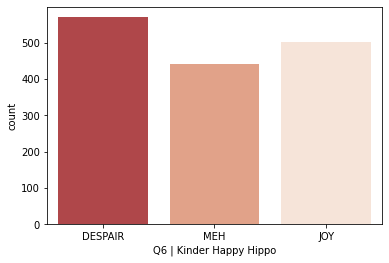

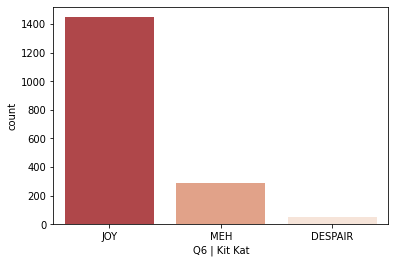

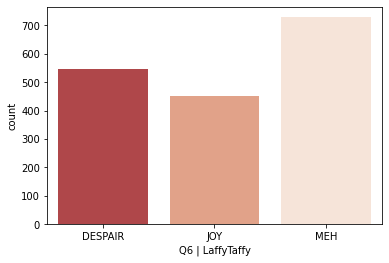

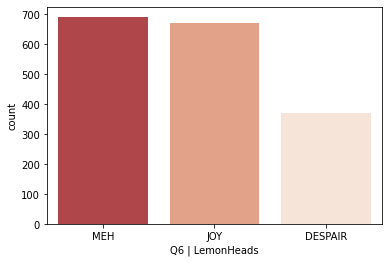

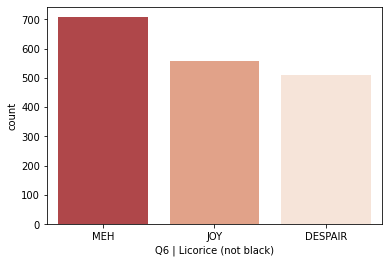

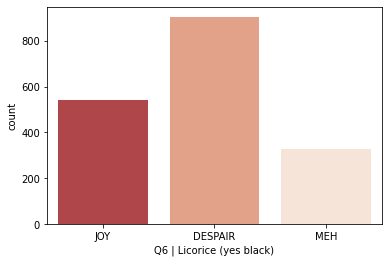

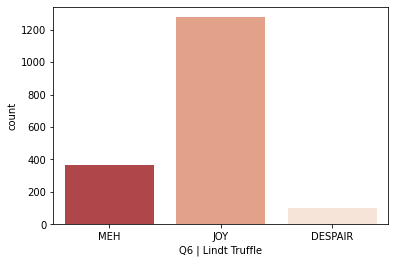

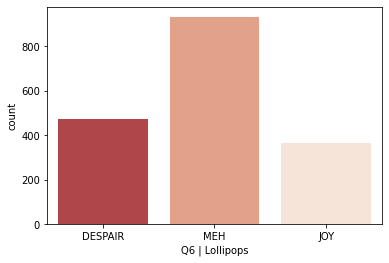

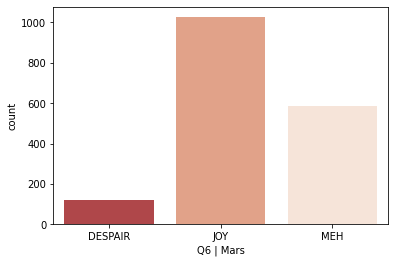

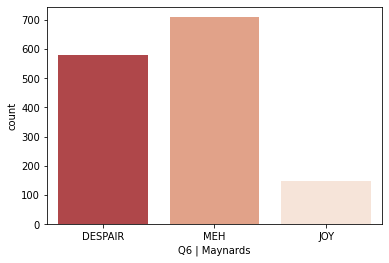

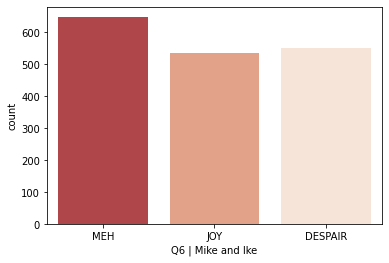

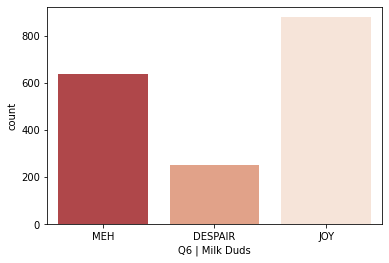

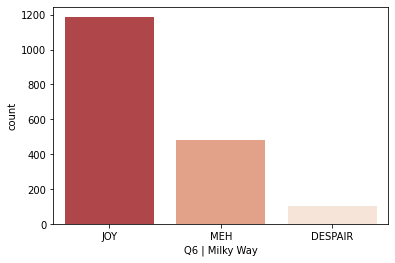

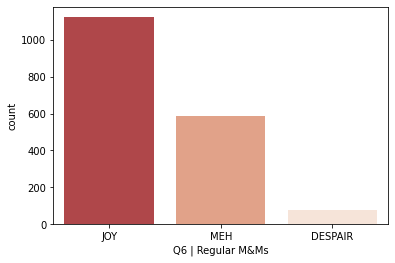

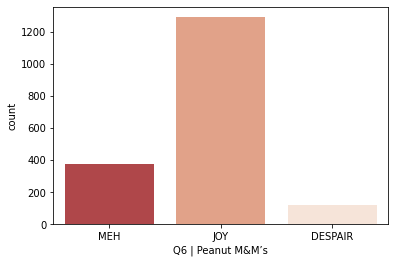

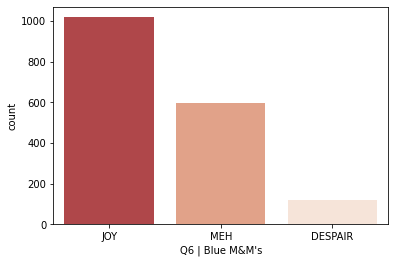

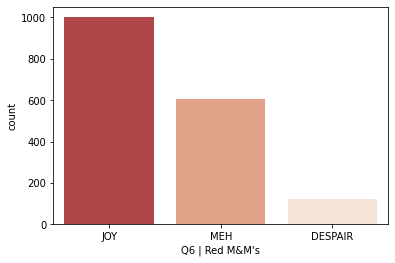

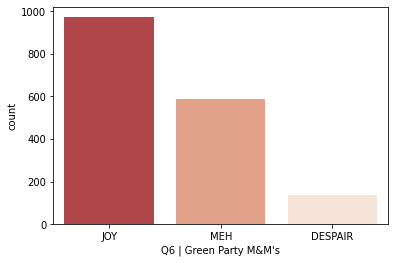

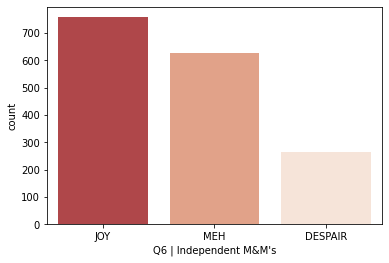

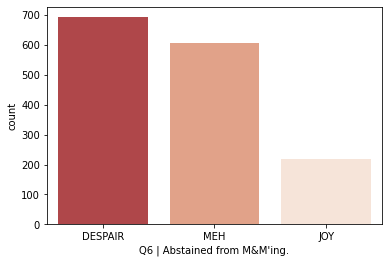

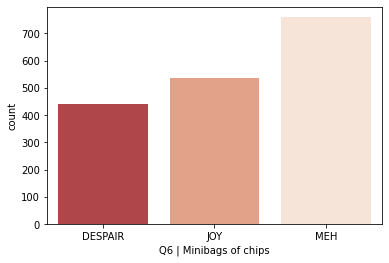

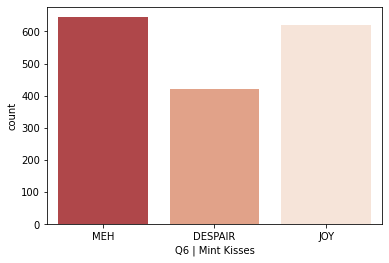

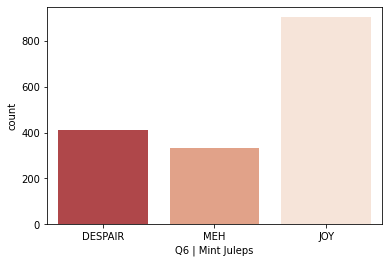

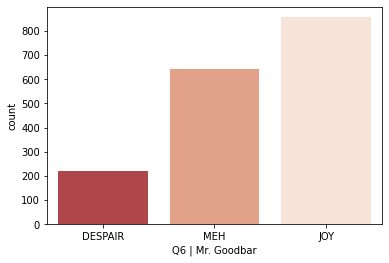

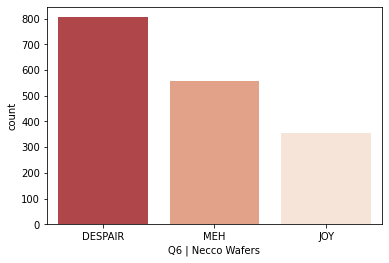

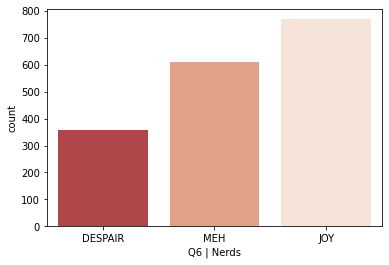

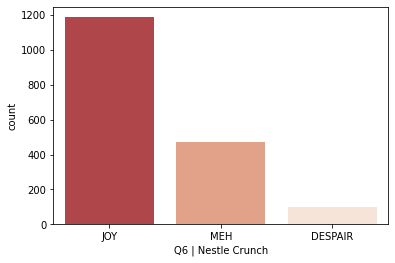

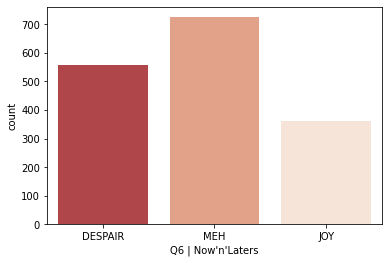

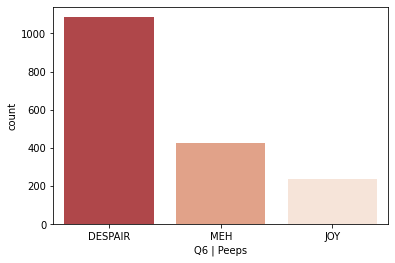

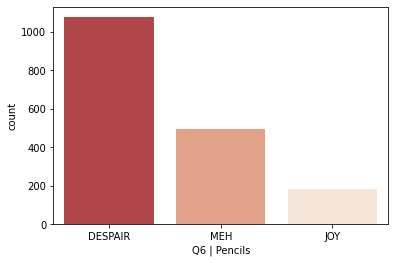

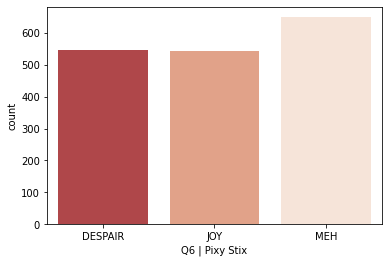

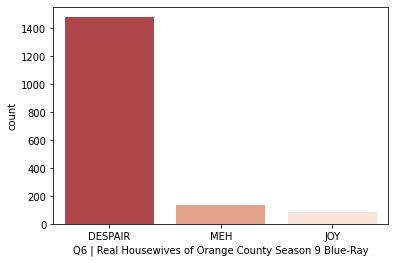

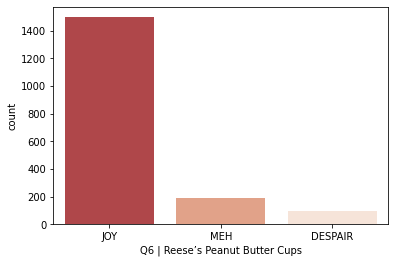

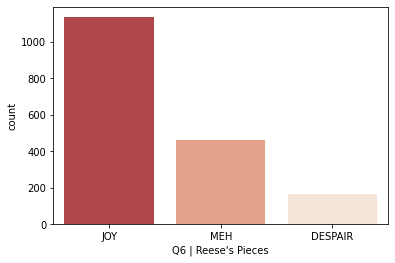

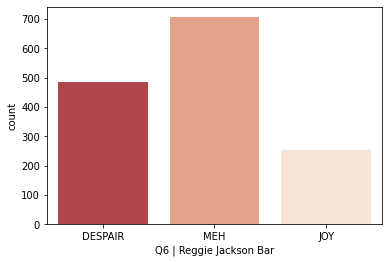

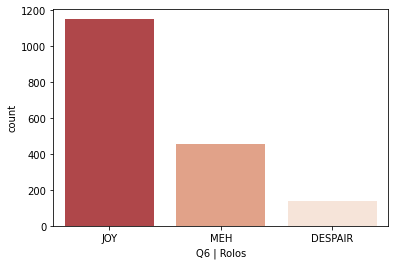

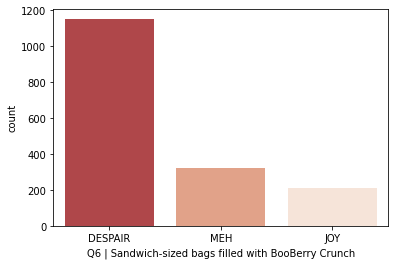

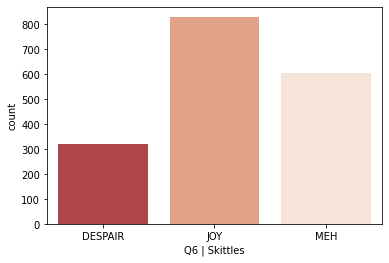

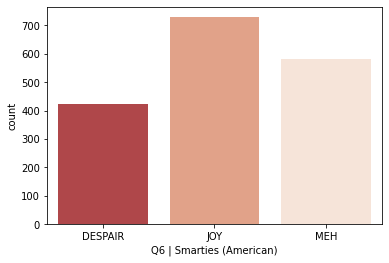

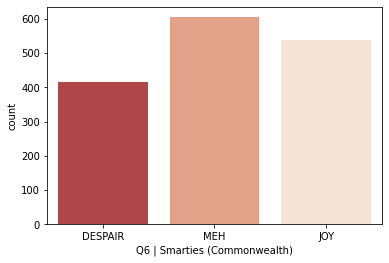

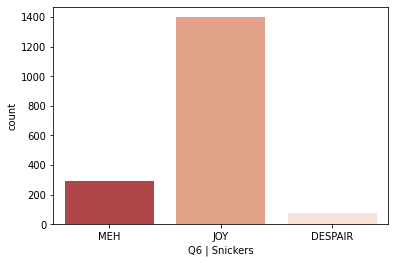

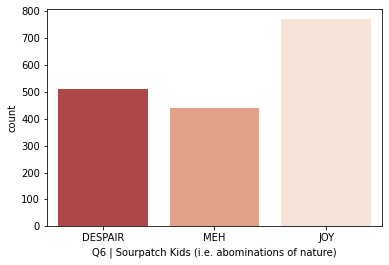

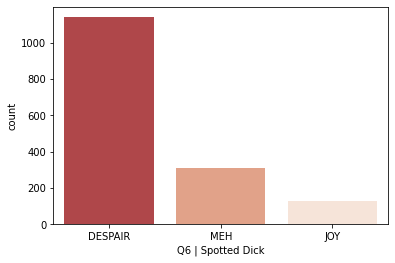

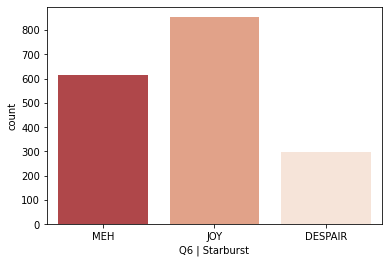

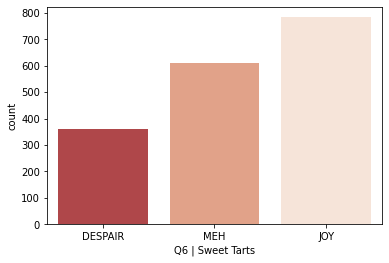

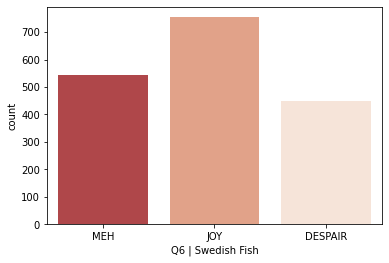

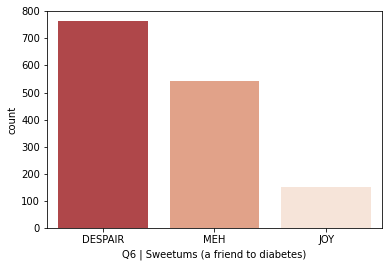

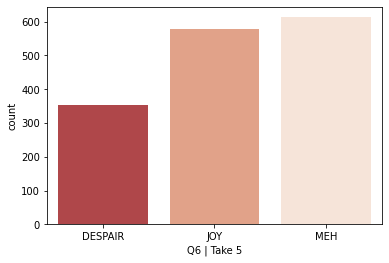

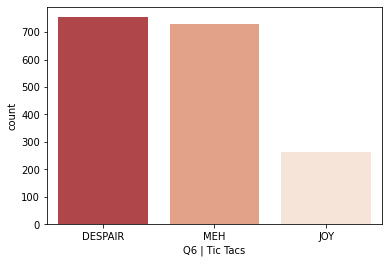

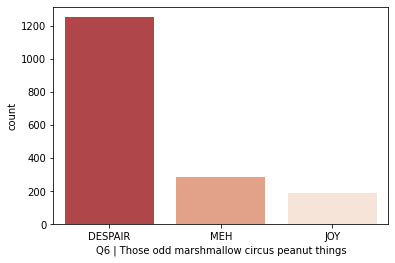

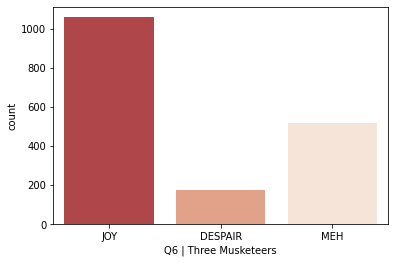

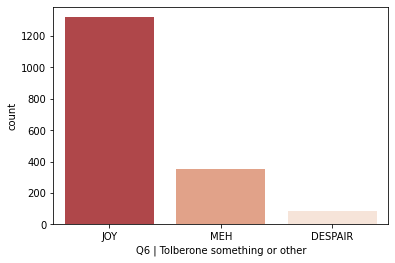

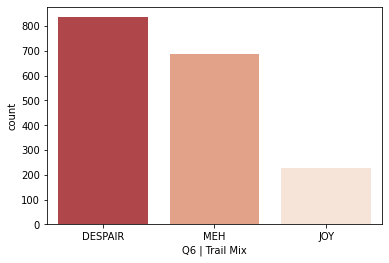

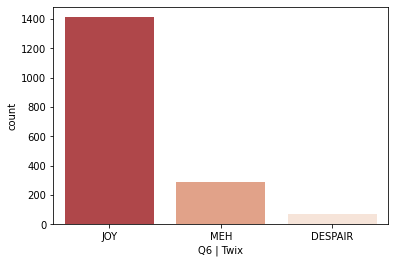

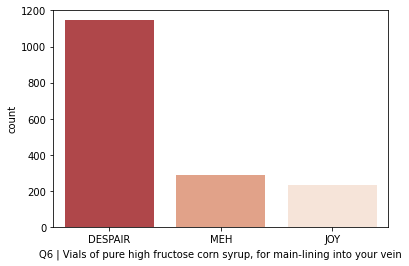

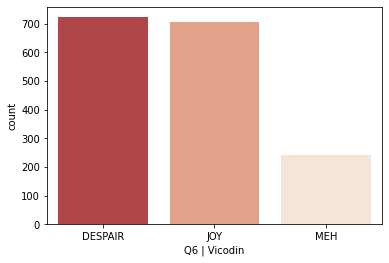

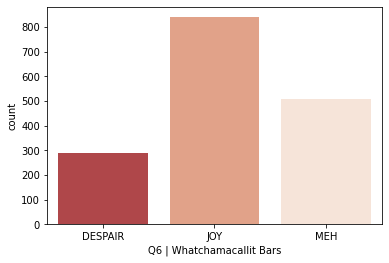

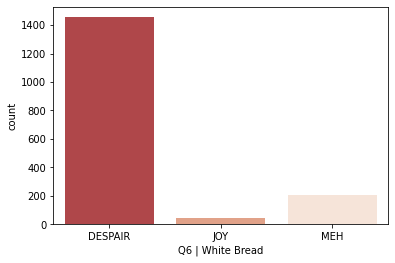

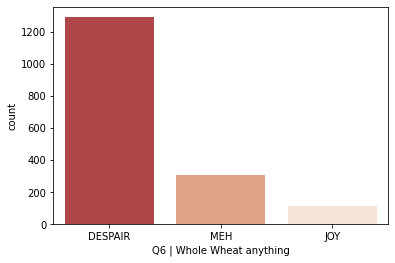

In [130]:
for i in  data.columns:
    sns.countplot(x=i ,data=data)
    plt.show()

طلعيهم انت بقا علشان زهقت اكيد مش هقعد ادور فيهم -_-